In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_image_and_plot_histogram(image_path):
    image = Image.open(image_path)
    
    grayscale_image = image.convert("L")
    image_array = np.array(grayscale_image)
    plt.hist(image_array.flatten(), bins=256, range=[0,256], color='black', alpha=0.7)
    plt.title('Гистограмма яркости')
    plt.xlabel('Яркость')
    plt.ylabel('Количество пикселей')
    plt.show()

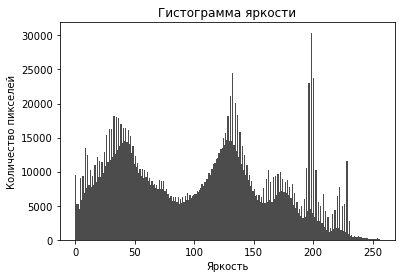

In [10]:
load_image_and_plot_histogram('Cars.jpeg')

In [11]:
# Загрузка изображения
image = Image.open('Cars.jpeg')
# Преобразование изображения в градации серого
grayscale_image = image.convert("L")
    
# Преобразование изображения в одномерный массив numpy
original_image_array = np.array(grayscale_image).flatten()

# Вычисление и применение эквализации гистограммы
histogram, bins = np.histogram(original_image_array, bins=256, range=[0,256], density=False)
cdf = histogram.cumsum()
cdf_normalized = 255 * cdf // cdf[-1]
image_equalized_array = cdf_normalized[original_image_array]
image_equalized = image_equalized_array.reshape(grayscale_image.size[::-1])
equalized_image = Image.fromarray(np.uint8(image_equalized), 'L')

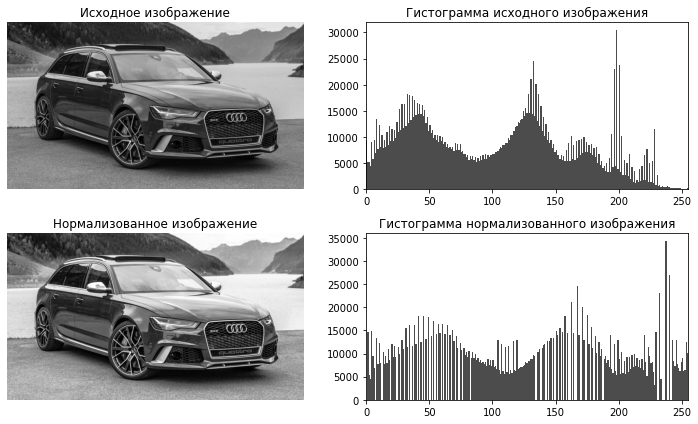

In [5]:
# Визуализация
plt.figure(figsize=(10, 6))

# Исходное изображение и его гистограмма
plt.subplot(2, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(original_image_array, bins=256, range=[0,256], color='black', alpha=0.7)
plt.title('Гистограмма исходного изображения')
plt.xlim([0, 255])

# Нормализованное изображение
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Нормализованное изображение')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(image_equalized_array, bins=256, range=[0,256], color='black', alpha=0.7)
plt.title('Гистограмма нормализованного изображения')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()